In [47]:
import numpy as np
import math
import time
from datetime import datetime, timezone
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [48]:
subjects_as_ints = [3509524, 5132496, 1066528, 5498603, 2638030, 2598705,
                    5383425, 1455390, 4018081, 9961348,1449548, 8258170,
                    781756, 9106476, 8686948, 8530312, 3997827, 4314139,
                    1818471, 4426783, 8173033, 7749105, 5797046, 759667,
                    8000685, 6220552, 844359, 9618981, 1360686, 46343,
                    8692923]

subjects_as_ints_min = [3509524, 5132496]

datetime_string = "2023-12-10 22:00:00"
dt = datetime.strptime(datetime_string, "%Y-%m-%d %H:%M:%S")
BASE_TIME = int(dt.replace(tzinfo=timezone.utc).timestamp())

In [49]:
def read_all_heart_rates(subjects):
    df = pd.DataFrame()
    for sub_id in subjects:
        sub_data = read_heart_rate(sub_id)
        df = pd.concat([df, sub_data], ignore_index=True)
    return df

def read_heart_rate(sub_id):
    data = pd.read_csv('data/heart_rate/' + str(sub_id) + '_heartrate.txt', delimiter=',').values
    time = data[:,0]
    time = BASE_TIME + time
    time = pd.to_datetime(time, unit='s')
    heart_rate = data[:,1]
    df = pd.DataFrame({'time': time, 'heart_rate': heart_rate, 'ID': sub_id})
    return df

In [50]:
heart_rates = read_all_heart_rates(subjects_as_ints)
print(heart_rates.head())
print(len(heart_rates))
print(heart_rates.isnull().sum())

                           time  heart_rate       ID
0 2023-12-03 22:15:01.180589914        77.0  3509524
1 2023-12-03 22:31:22.431269884        68.0  3509524
2 2023-12-03 22:37:45.806010008        65.0  3509524
3 2023-12-03 22:40:19.805700064        79.0  3509524
4 2023-12-03 22:45:49.965310097        71.0  3509524
254394
time          0
heart_rate    0
ID            0
dtype: int64


In [51]:
labels = pd.read_csv('labels.csv') 
labels['time'] = pd.to_datetime(labels['time'])

In [52]:
def crop_extra(data):
    df = pd.DataFrame()
    for _, (subject_id, subject_labels) in enumerate(labels.groupby('ID')):
        print('subject_id: {}'.format(subject_id))
        start = subject_labels['time'].min()
        end = subject_labels['time'].max()
        print('start: {}, end: {}'.format(start, end))
        condition1 = data['ID'] == subject_id
        condition2 = data['time'] >= start
        condition3 = data['time'] <= end
        filtered = data[(condition1 & condition2 & condition3)]
        og = data[condition1]
        print('Number of datapoints: {}'.format(len(filtered)))
        print('percentage of original: {}'.format(len(filtered) / len(og)))
        df = pd.concat([df, filtered], ignore_index=True)
    return df

In [53]:
heart_rates = crop_extra(heart_rates)

subject_id: 46343
start: 2023-12-10 22:06:30, end: 2023-12-11 02:43:00
Number of datapoints: 3225
percentage of original: 0.661267172442075
subject_id: 759667
start: 2023-12-10 22:00:30, end: 2023-12-11 01:57:00
Number of datapoints: 2837
percentage of original: 0.6490505605124686
subject_id: 781756
start: 2023-12-10 22:00:30, end: 2023-12-11 06:10:00
Number of datapoints: 16938
percentage of original: 0.9402686799156211
subject_id: 844359
start: 2023-12-10 22:22:00, end: 2023-12-11 05:50:00
Number of datapoints: 5167
percentage of original: 0.7221523410202656
subject_id: 1066528
start: 2023-12-10 22:00:30, end: 2023-12-11 05:55:30
Number of datapoints: 14874
percentage of original: 0.8951612903225806
subject_id: 1360686
start: 2023-12-10 22:09:00, end: 2023-12-11 06:02:30
Number of datapoints: 5458
percentage of original: 0.7835199540625897
subject_id: 1449548
start: 2023-12-10 22:05:30, end: 2023-12-11 06:02:00
Number of datapoints: 5486
percentage of original: 0.42603090782014447
su

In [54]:
print(len(heart_rates))

178218


In [55]:
scaler = MinMaxScaler()
heart_rates['heart_rate'] = scaler.fit_transform(heart_rates[['heart_rate']])

In [56]:
for _, (subject_id, subject_data) in enumerate(heart_rates.groupby('ID')):
    diff = subject_data['time'].diff()
    print('Average difference: {}'.format(diff.mean()))

Average difference: 0 days 00:00:05.143608526
Average difference: 0 days 00:00:04.999995694
Average difference: 0 days 00:00:01.733607552
Average difference: 0 days 00:00:05.201120574
Average difference: 0 days 00:00:01.912897806
Average difference: 0 days 00:00:05.205976060
Average difference: 0 days 00:00:05.210872443
Average difference: 0 days 00:00:05.189306466
Average difference: 0 days 00:00:05.194890063
Average difference: 0 days 00:00:05.532269103
Average difference: 0 days 00:00:05.244047120
Average difference: 0 days 00:00:04.999597938
Average difference: 0 days 00:00:05.159652705
Average difference: 0 days 00:00:04.999015733
Average difference: 0 days 00:00:05.213869505
Average difference: 0 days 00:00:05.210100250
Average difference: 0 days 00:00:04.999278437
Average difference: 0 days 00:00:05.225080208
Average difference: 0 days 00:00:05.189895123
Average difference: 0 days 00:00:05.163231935
Average difference: 0 days 00:00:05.171908881
Average difference: 0 days 00:00:3

In [57]:
heart_rates.to_csv('heart_rates.csv', index=False)

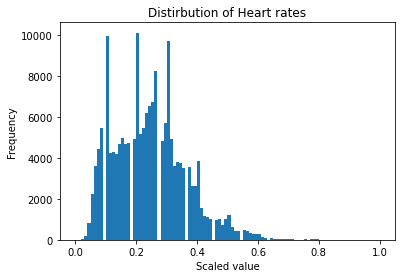

In [71]:
plt.figure()
plt.hist(heart_rates['heart_rate'], bins=100,histtype='stepfilled')
plt.title('Distirbution of Heart rates')
plt.xlabel('Scaled value')
plt.ylabel('Frequency')
plt.show()